### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

In [1]:
### Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
### Load the dataset
data = pd.read_csv("tips.csv")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [199]:
# Shape of the dataset
data.shape

(244, 7)

Dataset has 7 features (6 independent & 1 dependent column) 

In [200]:
# Creating numerical and categorical columns
data_num = data.select_dtypes(include=np.number)
data_cat = data.select_dtypes(exclude=np.number)

In [201]:
# Numeric columns
data_num.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [202]:
# Categorical columns
data_cat.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [203]:
#Days on which tips were recieved
data['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [204]:
# Average bill amount
data.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

In [205]:
data.groupby('sex')['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

Male were more generous with the tips

In [206]:
data['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

More customers were seen in Dinner

In [207]:
# 5 point summary for the tips dataset
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


From the 5 point summary we can see that:

1) The minimum tips recieved was of $1

2) The maximum tips received was of $10

In [208]:
# Busiest days of the week
data.groupby('day')['size'].count()

day
Fri     19
Sat     87
Sun     76
Thur    62
Name: size, dtype: int64

Saturday was the busiest day of the week

In [209]:
# Understanding the skewness distribution of the dataset 
x = data['total_bill'].skew()
x

1.1332130376158205

The variable 'total_bill' is highly skewed as the value is more than 1. 

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

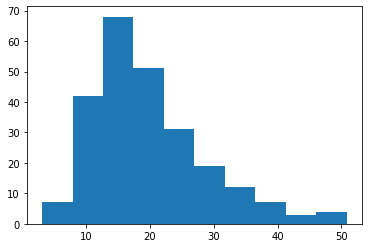

In [210]:
plt.hist(x=data['total_bill'])

As we can see there is a longer tail towards the right side, it is right-skewed in nature which is also called as positive skewed

In [211]:
# Finding the correlation
corr= data.corr()
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


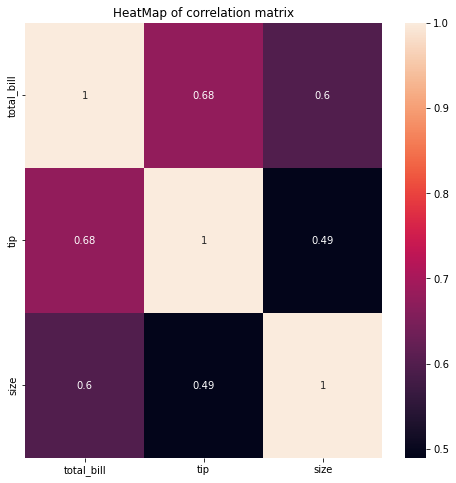

In [212]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, )
plt.title("HeatMap of correlation matrix")

plt.show()

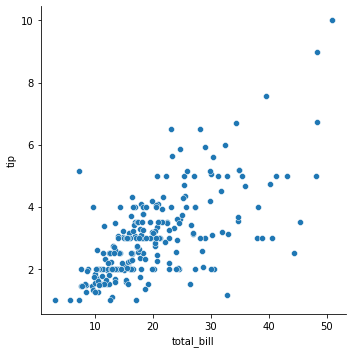

In [213]:
sns.relplot(x='total_bill', y='tip', data=data, palette='viridis')

As the value of the correlation between total_bill and tip is between 0.5 and 0.7, we can confirm that there is low to medium
correlation between these columns

We can visually see that there is a minute correlation between tip and total_bill and that is of a positive correlation

In [214]:
# Distribution with respect to gender
data['sex'].value_counts()/len(data)*100

Male      64.344262
Female    35.655738
Name: sex, dtype: float64

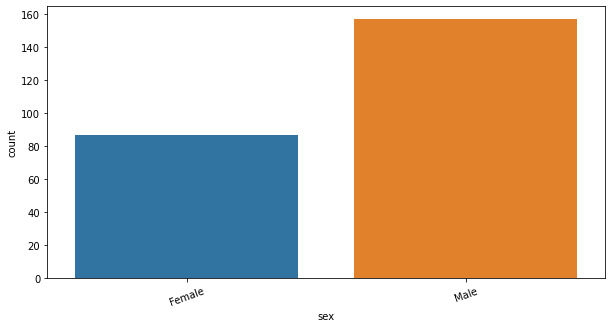

In [215]:
plt.figure(figsize=[10,5])
sns.countplot(x='sex',data=data)
plt.xticks(rotation = 20);

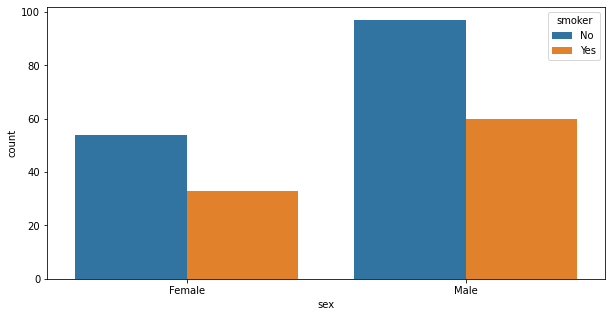

In [216]:
# Gender-wise smoking habits
plt.figure(figsize=[10,5])
sns.countplot(x = 'sex', hue = 'smoker', data = data)
plt.xticks;

In [217]:
# Average tip per day
data.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

In [219]:
# Relationship between bill amount and size of the group
data.groupby('size')['total_bill'].mean()

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

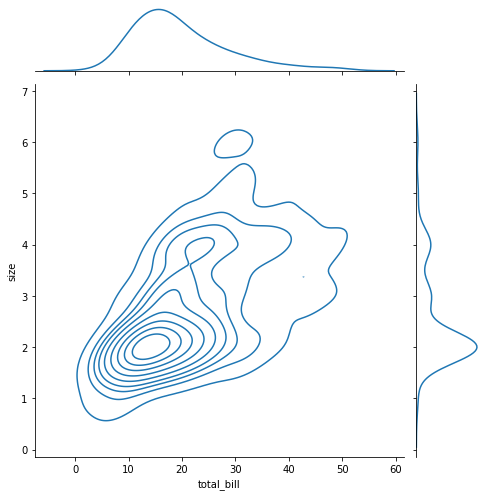

In [220]:
sns.jointplot(data=data, x="total_bill", y="size", height=7, kind='kde')

plt.show()

<AxesSubplot:xlabel='total_bill', ylabel='sex'>

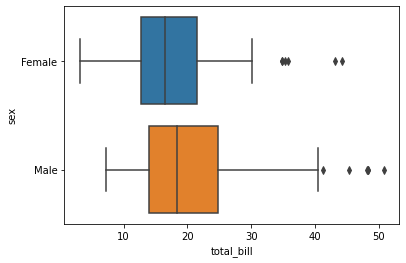

In [221]:
# Bill amount in genders
sns.boxplot(y=data['sex'],x=data['total_bill'])

The bill amount of male is higher in terms of it all 5 point factors (Min, Max, IQR, Mean, Median)

In [8]:
# Maximum bill for dinner and lunch
data.groupby('time')['total_bill'].max()

time
Dinner    50.81
Lunch     43.11
Name: total_bill, dtype: float64

The maximum bill for Dinner is 50.81 dollars and for Lunch is 48.17 dollars

In [223]:
# Percentage missing value
data.isnull().sum()/len(data)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

There are no missing values in the dataset

In [224]:
data.shape

(244, 7)

In [225]:
# Finding duplicate
duplicate = data[data.duplicated()]
duplicate

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [226]:
# Droping the duplicate row
data = data.drop_duplicates()

In [227]:
data.shape

(243, 7)

In [228]:
# Capping the column to 10% and 90% at lower and upper range
print(data['total_bill'].quantile(.10))
print(data['total_bill'].quantile(.90))

10.34
32.290000000000006


In [229]:
# Now removing the outliers
data['total_bill'] = np.where(data['total_bill']<10.33, 10.33, data['total_bill'])
data['total_bill'] = np.where(data['total_bill']>32.290000000000006,32.290000000000006,data['total_bill'])

C:\Users\shank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


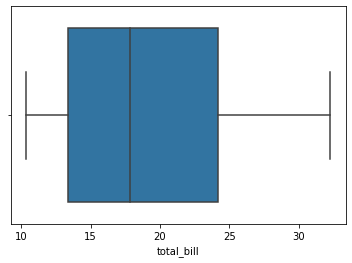

In [230]:
sns.boxplot(data['total_bill'])
plt.show()

Using Transform method, capped the data['total_bill'] column sucessfully

C:\Users\shank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


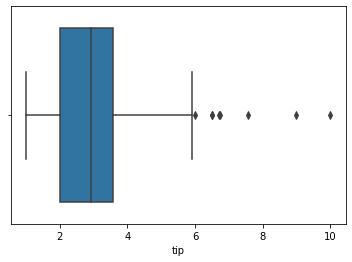

In [231]:
# Using IQR Method to find the outliers in tip column
sns.boxplot(data['tip'])
plt.show()

There are outliers present in the tip column.

In [232]:
q1 = data['tip'].quantile(0.25)
q3 = data['tip'].quantile(0.75)
iqr = q3-q1
ub = q3 + (1.5*iqr)
lb = q1 - (1.5*iqr)

In [233]:
data.drop(data[ (data.tip > ub) | (data.tip < lb) ].index , inplace=True)

In [234]:
data['tip'].describe()

count    235.000000
mean       2.853489
std        1.117249
min        1.000000
25%        2.000000
50%        2.750000
75%        3.500000
max        5.920000
Name: tip, dtype: float64

In [235]:
data.shape

(235, 7)

C:\Users\shank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


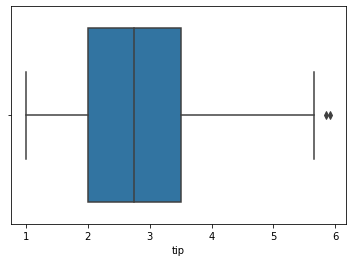

In [236]:
sns.boxplot(data['tip'])
plt.show()

Only 2 data point is classified as outlier after treatment

In [237]:
# Encoding categorical columns
data_cat.head(5)

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [238]:
# Integer encoding the columns where there are binary values like sex, smoker, time
data['sex'] = data['sex'].replace({'Male':0,'Female':1})

data['smoker'] = data['smoker'].replace({'Yes':1,'No':1})

data['time'] = data['time'].replace({'Dinner':1,'Lunch':0})

In [239]:
# Selecting 5 random samples

data.sample(n=5)

,total_bill,tip,sex,smoker,day,time,size
18,16.97,3.50,1,1,Sun,1,3
181,23.33,5.65,0,1,Sun,1,2
37,16.93,3.07,1,1,Sat,1,3
194,16.58,4.00,0,1,Thur,0,2
106,20.49,4.06,0,1,Sat,1,2


In [240]:
# Now One hot encoding for day column

data = pd.get_dummies(data,columns=['day'])
data.sample(n=5)

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun,day_Thur
26,13.37,2.00,0,1,1,2,0,1,0,0
218,10.33,1.44,0,1,1,2,0,1,0,0
216,28.15,3.00,0,1,1,5,0,1,0,0
28,21.70,4.30,0,1,1,2,0,1,0,0
199,13.51,2.00,0,1,0,2,0,0,0,1


In [242]:
data['total_bill'].describe()

count    235.000000
mean      18.878298
std        6.812252
min       10.330000
25%       13.275000
50%       17.470000
75%       23.505000
max       32.290000
Name: total_bill, dtype: float64

In [246]:
# Transforming data to range till 1
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [248]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(data) 
data.loc[:,:] = scaled_values

In [249]:
data

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun,day_Thur
0,0.303279,0.002033,1.0,0.0,1.0,0.2,0.0,0.0,1.0,0.0
1,0.000455,0.134146,0.0,0.0,1.0,0.4,0.0,0.0,1.0,0.0
2,0.486339,0.508130,0.0,0.0,1.0,0.4,0.0,0.0,1.0,0.0
3,0.607923,0.469512,0.0,0.0,1.0,0.2,0.0,0.0,1.0,0.0
4,0.649362,0.530488,1.0,0.0,1.0,0.6,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,0.851548,1.000000,0.0,0.0,1.0,0.4,0.0,1.0,0.0,0.0
240,0.767304,0.203252,1.0,0.0,1.0,0.2,0.0,1.0,0.0,0.0
241,0.561931,0.203252,0.0,0.0,1.0,0.2,0.0,1.0,0.0,0.0
242,0.341075,0.152439,0.0,0.0,1.0,0.2,0.0,1.0,0.0,0.0


In [281]:
# Loading the data for model building
tips_df = pd.read_csv("tips.csv")
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [282]:
# Using one-hot encoding for the categorical column encoding
data1 = pd.get_dummies(tips_df,columns=['sex','smoker','time'])
data1

,total_bill,tip,day,size,sex_Female,sex_Male,smoker_No,smoker_Yes,time_Dinner,time_Lunch
0,16.99,1.01,Sun,2,1,0,1,0,1,0
1,10.34,1.66,Sun,3,0,1,1,0,1,0
2,21.01,3.50,Sun,3,0,1,1,0,1,0
3,23.68,3.31,Sun,2,0,1,1,0,1,0
4,24.59,3.61,Sun,4,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Sat,3,0,1,1,0,1,0
240,27.18,2.00,Sat,2,1,0,0,1,1,0
241,22.67,2.00,Sat,2,0,1,0,1,1,0
242,17.82,1.75,Sat,2,0,1,1,0,1,0


In [283]:
# Trying mean encoding for dat column
data1.groupby('day')['total_bill'].mean() 

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

In [284]:
data1['day'] = data1.groupby('day')['total_bill'].transform('mean')

In [285]:
data1.head(5)

,total_bill,tip,day,size,sex_Female,sex_Male,smoker_No,smoker_Yes,time_Dinner,time_Lunch
0,16.99,1.01,21.41,2,1,0,1,0,1,0
1,10.34,1.66,21.41,3,0,1,1,0,1,0
2,21.01,3.50,21.41,3,0,1,1,0,1,0
3,23.68,3.31,21.41,2,0,1,1,0,1,0
4,24.59,3.61,21.41,4,1,0,1,0,1,0


In [286]:
# Separating the target variable in Y and independent variables in X
X = data1.drop('tip',axis=True)
y = data1['tip']

In [287]:
X.head()

,total_bill,day,size,sex_Female,sex_Male,smoker_No,smoker_Yes,time_Dinner,time_Lunch
0,16.99,21.41,2,1,0,1,0,1,0
1,10.34,21.41,3,0,1,1,0,1,0
2,21.01,21.41,3,0,1,1,0,1,0
3,23.68,21.41,2,0,1,1,0,1,0
4,24.59,21.41,4,1,0,1,0,1,0


In [288]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [295]:
# copy the data
df_min_max_scaled = X.copy()

# apply normalization techniques by total_bill
column = 'total_bill'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())	

# view normalized data
display(df_min_max_scaled)


,total_bill,day,size,sex_Female,sex_Male,smoker_No,smoker_Yes,time_Dinner,time_Lunch
0,0.291579,21.410000,2,1,0,1,0,1,0
1,0.152283,21.410000,3,0,1,1,0,1,0
2,0.375786,21.410000,3,0,1,1,0,1,0
3,0.431713,21.410000,2,0,1,1,0,1,0
4,0.450775,21.410000,4,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
239,0.543779,20.441379,3,0,1,1,0,1,0
240,0.505027,20.441379,2,1,0,0,1,1,0
241,0.410557,20.441379,2,0,1,0,1,1,0
242,0.308965,20.441379,2,0,1,1,0,1,0


In [298]:
# copy the data
df_min_max_scaled1 = df_min_max_scaled.copy()

# applying min-max normalization techniques by size
column = 'size'
df_min_max_scaled1[column] = (df_min_max_scaled1[column] - df_min_max_scaled1[column].min()) / (df_min_max_scaled1[column].max() - df_min_max_scaled1[column].min())	

# view normalized data
display(df_min_max_scaled1)


,total_bill,day,size,sex_Female,sex_Male,smoker_No,smoker_Yes,time_Dinner,time_Lunch
0,0.291579,21.410000,0.2,1,0,1,0,1,0
1,0.152283,21.410000,0.4,0,1,1,0,1,0
2,0.375786,21.410000,0.4,0,1,1,0,1,0
3,0.431713,21.410000,0.2,0,1,1,0,1,0
4,0.450775,21.410000,0.6,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
239,0.543779,20.441379,0.4,0,1,1,0,1,0
240,0.505027,20.441379,0.2,1,0,0,1,1,0
241,0.410557,20.441379,0.2,0,1,0,1,1,0
242,0.308965,20.441379,0.2,0,1,1,0,1,0


In [307]:
X = df_min_max_scaled1.copy()
y = data1['tip']

In [311]:
X

,total_bill,day,size,sex_Female,sex_Male,smoker_No,smoker_Yes,time_Dinner,time_Lunch
0,0.291579,21.410000,0.2,1,0,1,0,1,0
1,0.152283,21.410000,0.4,0,1,1,0,1,0
2,0.375786,21.410000,0.4,0,1,1,0,1,0
3,0.431713,21.410000,0.2,0,1,1,0,1,0
4,0.450775,21.410000,0.6,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
239,0.543779,20.441379,0.4,0,1,1,0,1,0
240,0.505027,20.441379,0.2,1,0,0,1,1,0
241,0.410557,20.441379,0.2,0,1,0,1,1,0
242,0.308965,20.441379,0.2,0,1,1,0,1,0


In [312]:
# Splitting the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 0)

In [313]:
X_train

,total_bill,day,size,sex_Female,sex_Male,smoker_No,smoker_Yes,time_Dinner,time_Lunch
61,0.224969,20.441379,0.2,0,1,0,1,1,0
146,0.326142,17.682742,0.4,1,0,1,0,0,1
52,0.664851,21.410000,0.6,1,0,1,0,1,0
66,0.280268,20.441379,0.2,1,0,1,0,1,0
26,0.215752,20.441379,0.2,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
67,0.000000,20.441379,0.0,1,0,0,1,1,0
192,0.531420,17.682742,0.2,0,1,0,1,0,1
117,0.158777,17.682742,0.2,1,0,1,0,0,1
47,0.614370,21.410000,0.6,0,1,1,0,1,0


In [314]:
X_test

,total_bill,day,size,sex_Female,sex_Male,smoker_No,smoker_Yes,time_Dinner,time_Lunch
64,0.304147,20.441379,0.4,0,1,1,0,1,0
63,0.318810,20.441379,0.6,0,1,0,1,1,0
55,0.343946,21.410000,0.2,0,1,1,0,1,0
111,0.087558,20.441379,0.0,1,0,1,0,1,0
225,0.276498,17.151579,0.2,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
90,0.542522,17.151579,0.2,0,1,0,1,1,0
101,0.257855,17.151579,0.2,1,0,0,1,1,0
75,0.155844,20.441379,0.2,0,1,1,0,1,0
4,0.450775,21.410000,0.6,1,0,1,0,1,0


In [315]:
y_train

61     2.00
146    1.36
52     5.20
66     2.47
26     2.00
       ... 
67     1.00
192    2.56
117    1.50
47     6.00
172    5.15
Name: tip, Length: 170, dtype: float64

In [316]:
y_test

64     2.64
63     3.76
55     3.51
111    1.00
225    2.50
       ... 
90     3.00
101    3.00
75     1.25
4      3.61
109    4.00
Name: tip, Length: 74, dtype: float64

In [317]:
# Training a linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [318]:
y_pred = regressor.predict(X_test)

In [319]:
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns = ["Original Tips","Predict Tip"])
calculation.head(5)

,Original Tips,Predict Tip
0,2.64,2.881287
1,3.76,3.053471
2,3.51,2.754646
3,1.00,1.455865
4,2.50,2.494596


In [320]:
print("Training Accuracy :", regressor.score(X_train, y_train))
print("Testing Accuracy :", regressor.score(X_test, y_test))

Training Accuracy : 0.4588836195856756
Testing Accuracy : 0.4719867720056019


In [328]:
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
SLR_model = sm.OLS(y_train, X_train).fit()

In [329]:
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     23.04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           1.37e-19
Time:                        16:23:56   Log-Likelihood:                -247.15
No. Observations:                 170   AIC:                             508.3
Df Residuals:                     163   BIC:                             530.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
total_bill      4.3078      0.539      7.996      